In [ ]:
from google.colab import files
uploaded = files.upload()

import zipfile
import os

zip_path = '/content/archive (1).zip'
extract_path = '/content/Emotion detection_dataset_2'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Extracted to:", extract_path)


Saving archive (1).zip to archive (1) (1).zip
✅ Extracted to: /content/Emotion detection_dataset_2


In [ ]:
# Check where 'train/' and 'test/' directories are
for root, dirs, files in os.walk('/content/Emotion detection_dataset_2'):
    level = root.replace('/content/Emotion detection_dataset_2', '').count(os.sep)
    indent = ' ' * 2 * level
    print(f"{indent}{os.path.basename(root)}/")
    for d in dirs:
        print(f"{indent}  {d}/")


Emotion detection_dataset_2/
  test/
  train/
  test/
    sad/
    surprised/
    happy/
    disgusted/
    neutral/
    angry/
    fearful/
    sad/
    surprised/
    happy/
    disgusted/
    neutral/
    angry/
    fearful/
  train/
    sad/
    surprised/
    happy/
    disgusted/
    neutral/
    angry/
    fearful/
    sad/
    surprised/
    happy/
    disgusted/
    neutral/
    angry/
    fearful/


In [ ]:
DATASET_DIR = '/content/Emotion detection_dataset_2/angry/'

Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Epoch 1/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 523s 726ms/step - accuracy: 0.2567 - loss: 1.8185 - val_accuracy: 0.3731 - val_loss: 1.6143
Epoch 2/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 542s 699ms/step - accuracy: 0.3678 - loss: 1.6020 - val_accuracy: 0.4163 - val_loss: 1.4975
Epoch 3/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 503s 701ms/step - accuracy: 0.4109 - loss: 1.4847 - val_accuracy: 0.4491 - val_loss: 1.4269
Epoch 4/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 495s 690ms/step - accuracy: 0.4629 - loss: 1.3754 - val_accuracy: 0.4545 - val_loss: 1.4038
Epoch 5/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 496s 681ms/step - accuracy: 0.5030 - loss: 1.2860 - val_accuracy: 0.4538 - val_loss: 1.4108
Epoch 6/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 497s 692ms/step - accuracy: 0.5484 - loss: 1.1761 - val_accuracy: 0.4675 - val_loss: 1.4058
Epoch 7/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 487s 679ms/step - accuracy: 0.5767 - loss

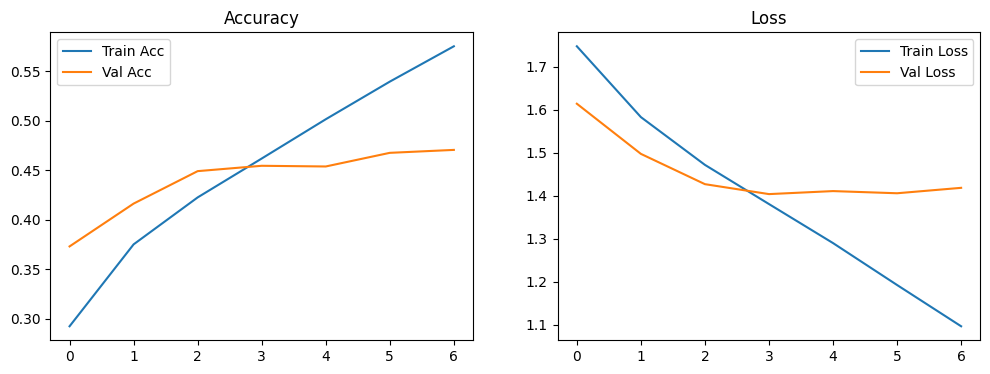

7178/7178 ━━━━━━━━━━━━━━━━━━━━ 70s 10ms/step


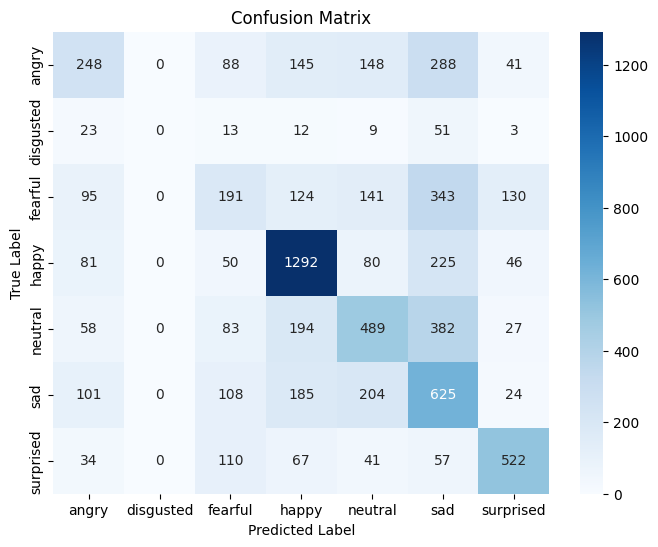

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
               precision    recall  f1-score   support

       angry       0.39      0.26      0.31       958
   disgusted       0.00      0.00      0.00       111
     fearful       0.30      0.19      0.23      1024
       happy       0.64      0.73      0.68      1774
     neutral       0.44      0.40      0.42      1233
         sad       0.32      0.50      0.39      1247
   surprised       0.66      0.63      0.64       831

    accuracy                           0.47      7178
   macro avg       0.39      0.39      0.38      7178
weighted avg       0.46      0.47      0.46      7178



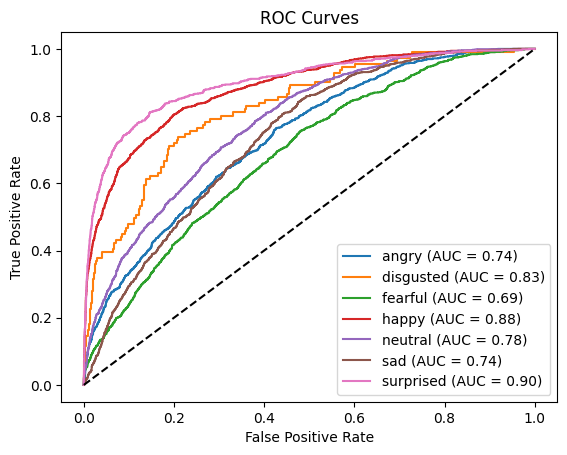

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import os

# Corrected dataset path
DATASET_DIR = '/content/Emotion detection_dataset_2'

# Settings
USE_GRAYSCALE = True
IMG_SIZE = (128, 128)
BATCH_SIZE = 32
EPOCHS = 10

color_mode = 'grayscale' if USE_GRAYSCALE else 'rgb'
channels = 1 if USE_GRAYSCALE else 3

# Data Generators
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    os.path.join(DATASET_DIR, 'train'),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    color_mode=color_mode,
    subset='training',
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    os.path.join(DATASET_DIR, 'train'),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    color_mode=color_mode,
    subset='validation',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    os.path.join(DATASET_DIR, 'test'),
    target_size=IMG_SIZE,
    batch_size=1,
    class_mode='categorical',
    color_mode=color_mode,
    shuffle=False
)

# CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(*IMG_SIZE, channels)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS,
    callbacks=[EarlyStopping(patience=3, restore_best_weights=True)]
)

# Learning Curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()
plt.show()

# Evaluation
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap='Blues')
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_true, y_pred_classes, target_names=class_labels))

# ROC Curves
plt.figure()
for i in range(len(class_labels)):
    fpr, tpr, _ = roc_curve(test_generator.labels == i, y_pred[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{class_labels[i]} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curves")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


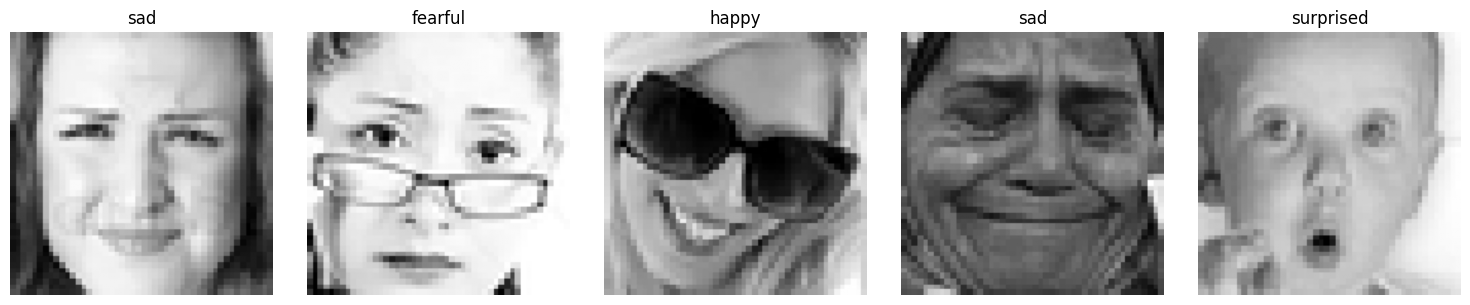

In [ ]:
# Display sample images from the generator
import matplotlib.pyplot as plt

def display_sample_images(generator, num_images=5):
    class_names = list(generator.class_indices.keys())
    images, labels = next(generator)
    plt.figure(figsize=(15, 3))

    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        image = images[i]
        label = class_names[np.argmax(labels[i])]

        if USE_GRAYSCALE:
            image = image.squeeze()  # Remove the channel dimension
            plt.imshow(image, cmap='gray')
        else:
            plt.imshow(image)

        plt.title(label)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

display_sample_images(train_generator)